In [48]:
#testing some stuff
import praw, credentials
import pandas as pd
import re
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#get setimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

#get tickers
tickers = pd.read_csv('data/tickers.csv')

In [10]:
#get tickers
tickers = pd.read_csv('data/tickers.csv')

#instance
reddit = praw.Reddit(
    client_id = credentials.client_id,
    client_secret = credentials.secret, 
    user_agent = credentials.user_id
)




In [50]:
#mentioned stocks
mentioned  = []
ticker_list = tickers['Ticker'].to_list()

#get polarity of stocks
polarity = {ticker: 0 for ticker in ticker_list}


for i, submission in enumerate(reddit.subreddit("stocks").hot(limit = None)):

    # score = sid.polarity_scores(submission.title)['compound']

    sub = re.sub(r'[^\w\s]', '', submission.title)
    sub_split = sub.split()

    text = re.sub(r'[^\w\s]', '', submission.selftext)
    text_split = text.split()

    for ticker in ticker_list:
        if ticker in sub_split:
            mentioned.append(ticker)
            pol_sub = sid.polarity_scores(submission.title)['compound']
            polarity[ticker] += pol_sub
            
        if ticker in text_split:
            mentioned.append(ticker)
            pol_text = sid.polarity_scores(submission.selftext)['compound']
            polarity[ticker] += pol_text
            

for i, submission in enumerate(reddit.subreddit("investing").hot(limit = None)):

    # score = sid.polarity_scores(submission.title)['compound']

    sub = re.sub(r'[^\w\s]', '', submission.title)
    sub_split = sub.split()

    text = re.sub(r'[^\w\s]', '', submission.selftext)
    text_split = text.split()

    for ticker in ticker_list:
        if ticker in sub_split:
            mentioned.append(ticker)
            pol_sub = sid.polarity_scores(submission.title)['compound']
            polarity[ticker] += pol_sub
            
        if ticker in text_split:
            mentioned.append(ticker)
            pol_text = sid.polarity_scores(submission.selftext)['compound']
            polarity[ticker] += pol_text


for i, submission in enumerate(reddit.subreddit("wallstreetbets").hot(limit = None)):

    # score = sid.polarity_scores(submission.title)['compound']

    sub = re.sub(r'[^\w\s]', '', submission.title)
    sub_split = sub.split()

    text = re.sub(r'[^\w\s]', '', submission.selftext)
    text_split = text.split()

    for ticker in ticker_list:
        if ticker in sub_split:
            mentioned.append(ticker)
            pol_sub = sid.polarity_scores(submission.title)['compound']
            polarity[ticker] += pol_sub
            
        if ticker in text_split:
            mentioned.append(ticker)
            pol_text = sid.polarity_scores(submission.selftext)['compound']
            polarity[ticker] += pol_text

In [51]:
for t in np.unique(mentioned):
    count = mentioned.count(t)
    polarity[t] /= count
    

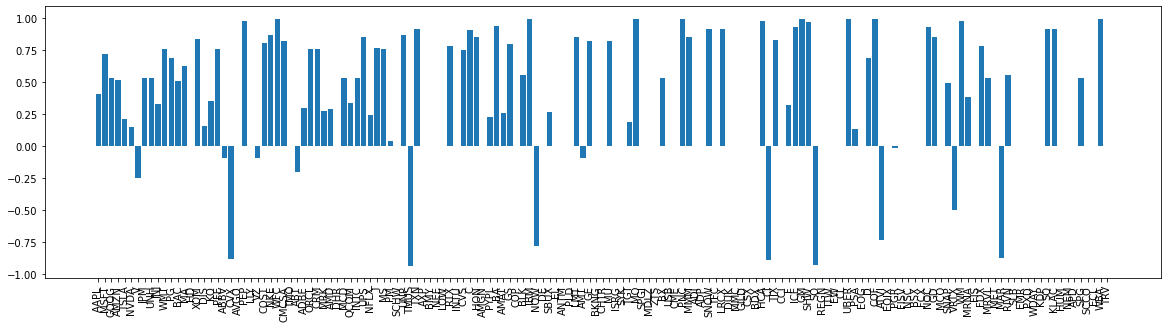

In [57]:
names = list(polarity.keys())
values = list(polarity.values())

plt.figure(figsize = (20, 5))
plt.bar(range(len(names)), values, tick_label = names)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:>

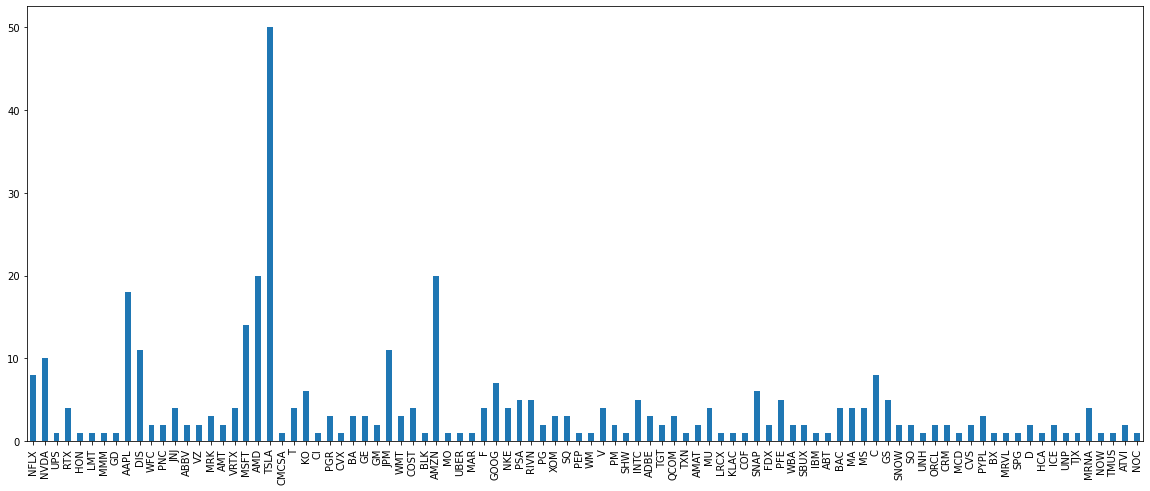

In [46]:
import pandas as pd
plt.figure(figsize = (20, 8))
pd.Series(mentioned).value_counts(sort = False).plot(kind = 'bar')